# **Sentimental Analysis of Twitter Data (Hackathon)**

---



> **Created by :**
* ***Rakesh Kedar***
* ***Pancham Desai***
* ***Vedant Thapa***
* ***Siddhesh Gupta***



## **Problem Statement :**


---


Twitter has now become a useful way to build one's business as it helps in giving the brand a voice and a personality. The platform is also a quick, easy and inexpensive way to gain valuable insight from the desired audience. Identifying the sentiments about the product/brand can help the business take better actions.

You have with you evaluated tweets about multiple brands. The evaluators(random audience) were asked if the tweet expressed positive, negative, or no emotion towards a product/brand and labelled accordingly.

![alt text](https://indianpythonista.files.wordpress.com/2017/01/sentiment-analysis.jpg?w=391&h=262)

## **Dataset Description:**

---
This dataset contains around 7k tweet text with the sentiment label.

The file train.csv has 3 columns

tweet_id - Unique id for tweets. tweet - Tweet about the brand/product sentiment - 
**0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell**


## **Evaluation Metric:**

---



We will be using ‘weighted’ F1-measure as the evaluation metric for this competition. 

## **Importing Required Libraries**

---



In [0]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns

## **Loading the Twitter Data**

---



In [0]:
#Upload file on google Colab
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [0]:
import io
#The command written below is generally used to load .csv format file 
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head(5)


,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


## **Check For Null Values**

---



In [0]:
df.loc[df.tweet.isnull()]
df.dropna(inplace=True)

,tweet_id,tweet,sentiment
1274,6,NaN,1


## **Stopword Removal**

---



In [0]:
nltk.download('stopwords')
STOPWORDS = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **WordCloud**

---
Below code is written to present the wordcloud of overall positive sentiment words , Negative Sentiment words , Neutral and can't tell words present in the data. 


Positive Words


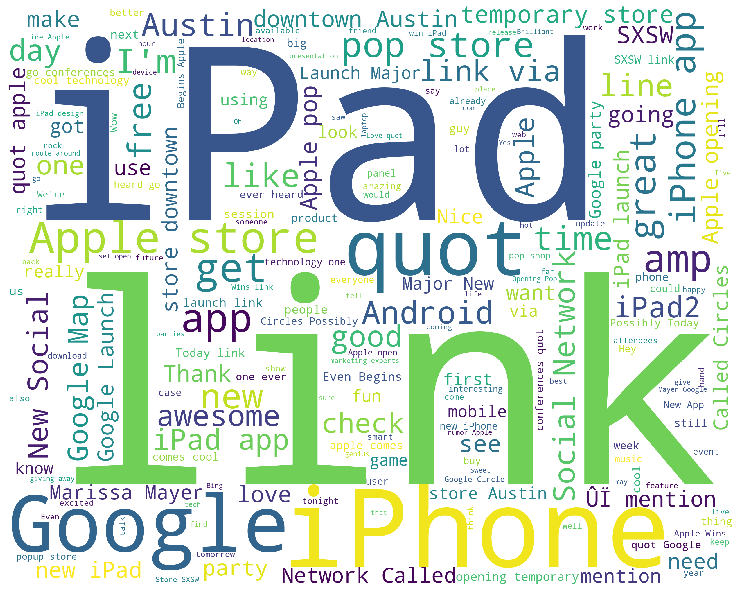

In [0]:
#Positive words wordcloud
from wordcloud import WordCloud
train_pos = df[df['sentiment'] == 2]
train_pos = train_pos['tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    print('Positive Words')
    plt.show()
    

wordcloud_draw(train_pos,'white')

Negative words


<Figure size 864x864 with 0 Axes>

Positive Words


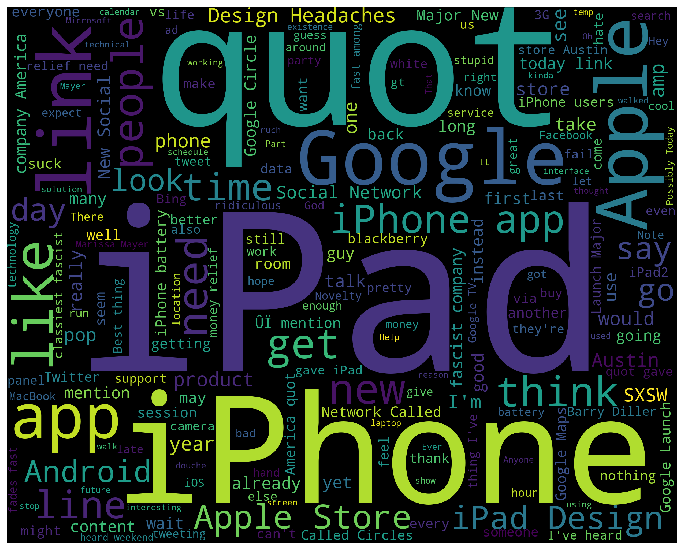

In [0]:
#Negative words word cloud
train_neg = df[ df['sentiment'] == 0]
train_neg = train_neg['tweet']
print("Negative words")
plt.figure(figsize=(12,12))
wordcloud_draw(train_neg)

neutral words


<Figure size 864x864 with 0 Axes>

Positive Words


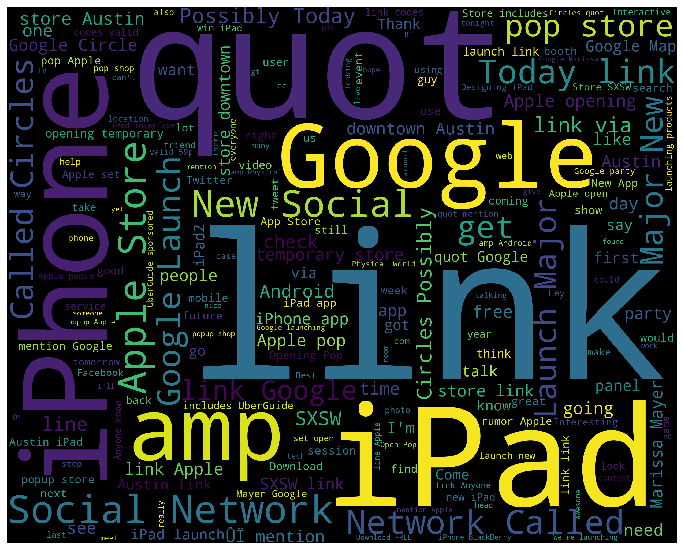

In [0]:
#Neutral Words in WordCloud
train_neu = df[ df['sentiment'] == 1]
train_neu= train_neu['tweet']
print("neutral words")
plt.figure(figsize=(12,12))
wordcloud_draw(train_neu)

# **Top 15 most occurred hashtags**

---



In [0]:
# Extract all the hashtags present in data
import re
m_hashtag = []
for i in df.tweet:
    value_email=re.findall (r'#[a-zA-Z0-9]*',i)
    m_hashtag.append(value_email)

df['Hashtags'] = m_hashtag

df_string_all_hashtag = []
lv_string = ""
for i in df.Hashtags:
    for j in i:
        lv_string = "".join(j)
    df_string_all_hashtag.append(lv_string)
    lv_string = ""

df['hastags'] = df_string_all_hashtag

df['hastags']=df['hastags'].str.lower()


In [0]:
#Use Counter to get top 15 hashtags
from collections import Counter
cnt = Counter()
for text in df["hastags"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(15)

[('#sxsw', 5322),
 ('#sxswi', 130),
 ('#ipad2', 112),
 ('#apple', 66),
 ('#ipad', 51),
 ('#iphone', 46),
 ('#tech', 35),
 ('#google', 35),
 ('#fb', 31),
 ('#circles', 28),
 ('#newtwitter', 27),
 ('#mashable', 22),
 ('#gsdm', 21),
 ('#japan', 19),
 ('#android', 19)]

In [0]:
#Visualisation using Seaborn
top15 = cnt.most_common(15)
top15_df = pd.DataFrame(top15)
top15_df.columns = ['hashtags','count']

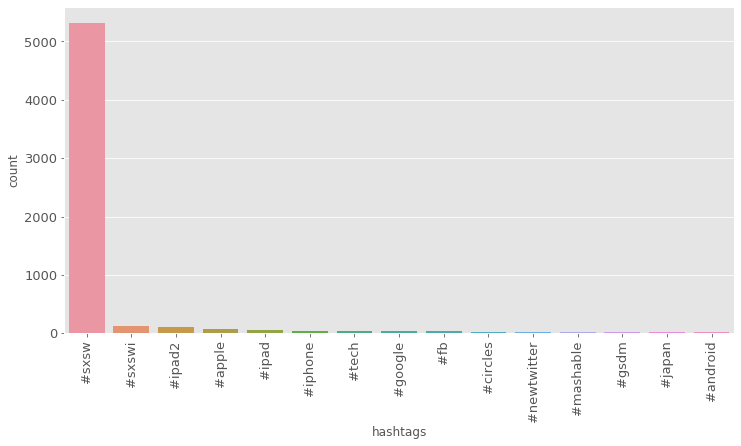

In [0]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(top15_df['hashtags'],top15_df['count'])
plt.xticks(rotation=90);

In [0]:
df.drop('hastags',inplace=True,axis=1)

# **Hashtags word cloud**

---



In [0]:
# negative hashtags
df_hashtags_negative = df[df.sentiment == 0].Hashtags

# neutral hashtags
df_hashtags_neutral = df[df.sentiment == 1].Hashtags

# positive hashtags
df_hashtags_positive = df[df.sentiment == 2].Hashtags

# cantsay hashtags
df_hashtags_cantsay = df[df.sentiment == 3].Hashtags

### **Negative Hashtags wordcloud**

---



<Figure size 864x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

[('iPad', 1.0),
 ('fail', 0.5714285714285714),
 ('pnid', 0.5714285714285714),
 ('tapworthy', 0.5714285714285714),
 ('Japan', 0.5714285714285714),
 ('iPhone', 0.42857142857142855),
 ('ipad2', 0.42857142857142855),
 ('apple', 0.42857142857142855),
 ('SaatchiNY', 0.2857142857142857),
 ('diller', 0.2857142857142857),
 ('comments', 0.2857142857142857),
 ('Silly', 0.2857142857142857),
 ('sightings', 0.2857142857142857),
 ('ui', 0.2857142857142857),
 ('Bing', 0.2857142857142857),
 ('Illmakeitwork', 0.14285714285714285),
 ('imthatgood', 0.14285714285714285),
 ('netflixiphone', 0.14285714285714285),
 ('owllove', 0.14285714285714285),
 ('Sxsw', 0.14285714285714285),
 ('csr', 0.14285714285714285),
 ('CNN', 0.14285714285714285),
 ('rji', 0.14285714285714285),
 ('rejection', 0.14285714285714285),
 ('qagb', 0.14285714285714285),
 ('CStejas', 0.14285714285714285),
 ('wwsxsw', 0.14285714285714285),
 ('FML', 0.14285714285714285),
 ('futureoftouch', 0.14285714285714285),
 ('GOOD', 0.14285714285714285),


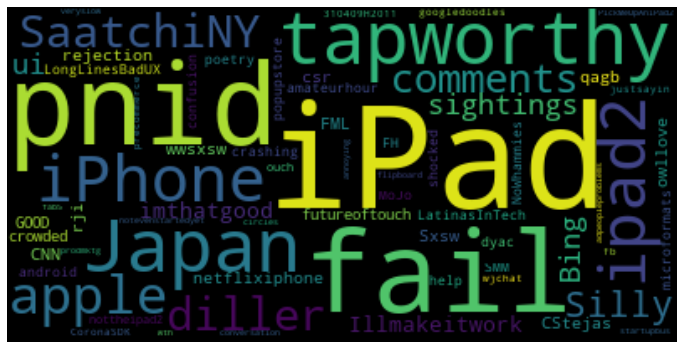

In [0]:
#negative hashtags WordCloud
df_string_negative_hashtag = []
lv_string = ""
for i in df_hashtags_negative:
    for j in i:
        lv_string = "".join(j)
    df_string_negative_hashtag.append(lv_string)
    lv_string = ""
    
textall = " ".join(df_string_negative_hashtag)
textall = textall.replace('#SXSW','')
textall = textall.replace('#sxsw','')
textall = textall.replace('#SxSW','')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud_negative_hashtag = WordCloud().generate(textall)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud_negative_hashtag, interpolation='bilinear')
plt.axis("off")

import operator
sorted_negative_hashtags = sorted(wordcloud_negative_hashtag.words_.items(), key=operator.itemgetter(1),reverse=True)

sorted_negative_hashtags

### **Positive Hashtags wordcloud**

---



<Figure size 720x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

[('iPad2', 1.0),
 ('apple', 0.6222222222222222),
 ('ipad', 0.3111111111111111),
 ('iPhone', 0.26666666666666666),
 ('fb', 0.2222222222222222),
 ('tech', 0.2),
 ('winning', 0.2),
 ('google', 0.17777777777777778),
 ('Sxsw', 0.17777777777777778),
 ('circles', 0.13333333333333333),
 ('cbatsxsw', 0.1111111111111111),
 ('Mashable', 0.1111111111111111),
 ('qagb', 0.08888888888888889),
 ('gsdm', 0.08888888888888889),
 ('mobile', 0.08888888888888889),
 ('photo', 0.08888888888888889),
 ('android', 0.08888888888888889),
 ('EMC', 0.08888888888888889),
 ('technology', 0.06666666666666667),
 ('ConnectedTV', 0.06666666666666667),
 ('lp', 0.06666666666666667),
 ('wssxsw', 0.06666666666666667),
 ('app', 0.06666666666666667),
 ('pnid', 0.06666666666666667),
 ('zazzlsxsw', 0.06666666666666667),
 ('cnet', 0.06666666666666667),
 ('tmsxsw', 0.06666666666666667),
 ('Austin', 0.06666666666666667),
 ('VIDEO', 0.06666666666666667),
 ('hollergram', 0.06666666666666667),
 ('poursite', 0.06666666666666667),
 ('ret

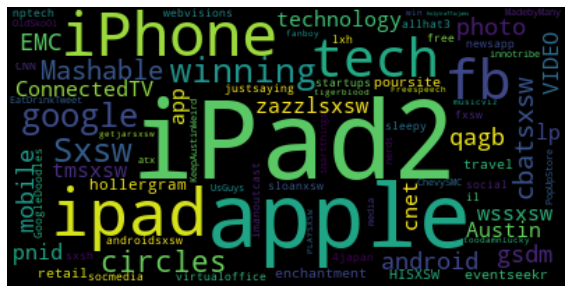

In [0]:
#Positive Hashtag WordCloud
df_string_positive_hashtag = []
lv_string = ""
for i in df_hashtags_positive:
    for j in i:
        lv_string = "".join(j)
    df_string_positive_hashtag.append(lv_string)
    lv_string = ""
    
textall = " ".join(df_string_positive_hashtag)
textall = textall.replace('#SXSW','')
textall = textall.replace('#sxsw','')
textall = textall.replace('#SxSW','')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud_positive_hashtag = WordCloud().generate(textall)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive_hashtag, interpolation='bilinear')
plt.axis("off")

import operator
sorted_positive_hashtags = sorted(wordcloud_positive_hashtag.words_.items(), key=operator.itemgetter(1),reverse=True)
sorted_positive_hashtags

### **Neutral Hashtags wordcloud**

---



<Figure size 720x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

[('ipad2', 1.0),
 ('apple', 0.546875),
 ('iPhone', 0.484375),
 ('ipad', 0.4375),
 ('google', 0.421875),
 ('newTwitter', 0.421875),
 ('tech', 0.40625),
 ('circles', 0.328125),
 ('fb', 0.3125),
 ('Mashable', 0.265625),
 ('gsdm', 0.25),
 ('UXDes', 0.234375),
 ('Android', 0.21875),
 ('austin', 0.203125),
 ('Japan', 0.203125),
 ('necro', 0.1875),
 ('GroundLink', 0.15625),
 ('zlf', 0.15625),
 ('qagb', 0.15625),
 ('socialmedia', 0.140625),
 ('winning', 0.140625),
 ('technology', 0.140625),
 ('photo', 0.140625),
 ('iTunes', 0.125),
 ('Sxsw', 0.125),
 ('H4cker', 0.125),
 ('quake', 0.125),
 ('enchantment', 0.109375),
 ('cvdc', 0.109375),
 ('cnet', 0.109375),
 ('zomb', 0.109375),
 ('mobile', 0.09375),
 ('marketing', 0.09375),
 ('partylikeits1986', 0.09375),
 ('app', 0.09375),
 ('pass', 0.078125),
 ('touchingstories', 0.078125),
 ('nfusion', 0.078125),
 ('privacybootcamp', 0.078125),
 ('iC', 0.078125),
 ('gadgets', 0.078125),
 ('donline', 0.0625),
 ('sa', 0.0625),
 ('NL', 0.0625),
 ('fail', 0.0625

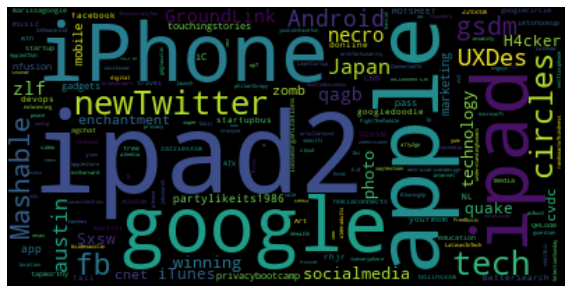

In [0]:
#Neutral Hashtag Wordcloud
df_string_neutral_hashtag = []
lv_string = ""
for i in df_hashtags_neutral:
    for j in i:
        lv_string = "".join(j)
    df_string_neutral_hashtag.append(lv_string)
    lv_string = ""
    
textall = " ".join(df_string_neutral_hashtag)
textall = textall.replace('#SXSW','')
textall = textall.replace('#sxsw','')
textall = textall.replace('#SxSW','')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud_neutral_hashtag = WordCloud().generate(textall)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_neutral_hashtag, interpolation='bilinear')
plt.axis("off")

import operator
sorted_neutral_hashtags = sorted(wordcloud_neutral_hashtag.words_.items(), key=operator.itemgetter(1),reverse=True)
sorted_neutral_hashtags

### **Cant say hashtags wordcloud**

---



<Figure size 720x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

[('ipad', 1.0),
 ('bestworstthingever', 0.5),
 ('startupbus', 0.5),
 ('yourmom', 0.5),
 ('CStejas', 0.5),
 ('doyoureallyneedthat', 0.5),
 ('uxdes', 0.5),
 ('coudbeeasier', 0.5),
 ('buffalo', 0.5),
 ('netflixiphone', 0.5),
 ('psfk', 0.5),
 ('mrmworldwide', 0.5),
 ('microformats', 0.5),
 ('Japan', 0.5),
 ('SteveJobsWins', 0.5),
 ('impulse', 0.5),
 ('h4ckers', 0.5),
 ('notwinning', 0.5),
 ('qagb', 0.5),
 ('smccolumbus', 0.5),
 ('games', 0.5),
 ('randomly', 0.5),
 ('agchat', 0.5),
 ('gsdm', 0.5),
 ('austin', 0.5)]

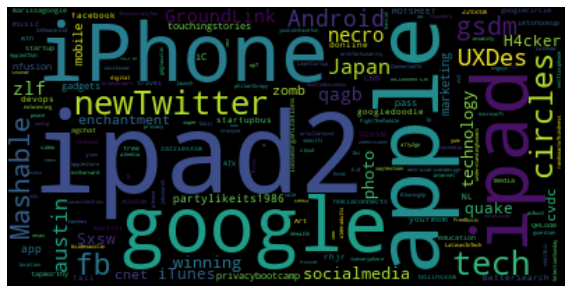

In [0]:
#Cantsay Hashtag Wordcloud
df_string_cantsay_hashtag = []
lv_string = ""
for i in df_hashtags_cantsay:
    for j in i:
        lv_string = "".join(j)
    df_string_cantsay_hashtag.append(lv_string)
    lv_string = ""
    
textall = " ".join(df_string_cantsay_hashtag)
textall = textall.replace('#SXSW','')
textall = textall.replace('#sxsw','')
textall = textall.replace('#SxSW','')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud_cantsay_hashtag = WordCloud().generate(textall)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_neutral_hashtag, interpolation='bilinear')
plt.axis("off")

import operator
sorted_cantsay_hashtags = sorted(wordcloud_cantsay_hashtag.words_.items(), key=operator.itemgetter(1),reverse=True)
sorted_cantsay_hashtags

## **Sentiments for Apple as brand**

---
![alt text](https://images.macrumors.com/article-new/2018/10/appleinvitedesign3-800x509.jpg)

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
2,one of the most in-your-face ex. of stealing t...,2
4,line outside the apple store in austin waiting...,1
5,#technews one lone dude awaits ipad 2 at apple...,1
18,apple opens pop up store at sxsw {link} via @m...,1
...,...,...
7255,"sweet, apple's opening a pop-up shop in the sc...",2
7258,@mention massive lines at #sxsw apple store......,2
7263,there are two apple stores in atx!! rt @mentio...,2
7265,"at #sxsw, apple schools the marketing experts ...",2


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Sentiments of people for Apple as brand')

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Count of tweets')

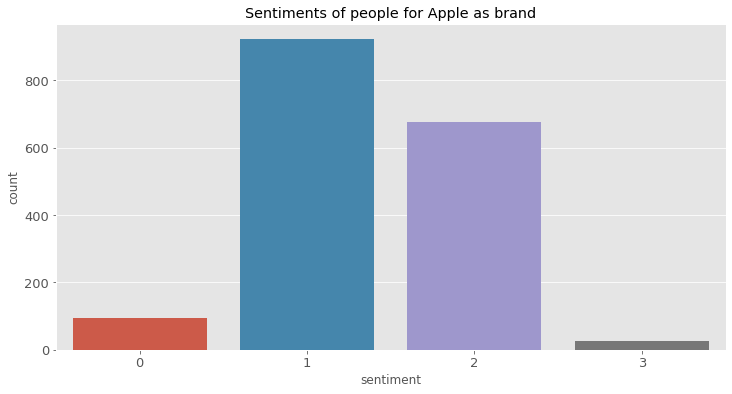

In [0]:
# Extract all the hashtags present in data
df1=df[['tweet','sentiment']]
df1['tweet']=df['tweet'].str.lower()
df1=df1[df1['tweet'].str.contains("apple")]
df1
print('=='*100)
#Visualisation of Sentiments for Apple brand
plt.figure(figsize=(12,6))
plt.title('Sentiments of people for Apple as brand')
plt.xlabel('Sentiment')
plt.ylabel('Count of tweets')
sns.countplot(df1['sentiment'])

## **observations**:
* The above plot shows the sentiments of people for Apple brand. About 1718 tweets were done in different sentiments about Apple. Out of the 1718 more than 800 tweets had neutral sentiments about apple.More than 600 tweets were having positive views about apple and very few tweets like less than 200 had hatred about apple and very few tweets come under category of cant say

## **Sentiments of people for Iphone**

---

,tweet,sentiment
3,this iphone #sxsw app would b pretty awesome i...,0
7,nu user rt @mention new #ubersocial for #iphon...,1
10,rt @mention official #sxsw app û÷sxsw goûª b...,3
13,rt @mention we're officially at #sxsw! come by...,1
14,"#companies to watch, from the #sxsw trade show...",1
...,...,...
7221,#sxsw: mistakes made building netflix for ipho...,1
7241,#winning #winning - just gave away 5 red mophi...,1
7251,"rt @mention #sxsw gear bag: ipad 2, iphone, mo...",1
7261,the new whrrl app is now live in the iphone ap...,2


<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Count of tweets')

Text(0.5, 1.0, 'Sentiments of people for Apples product iphone')

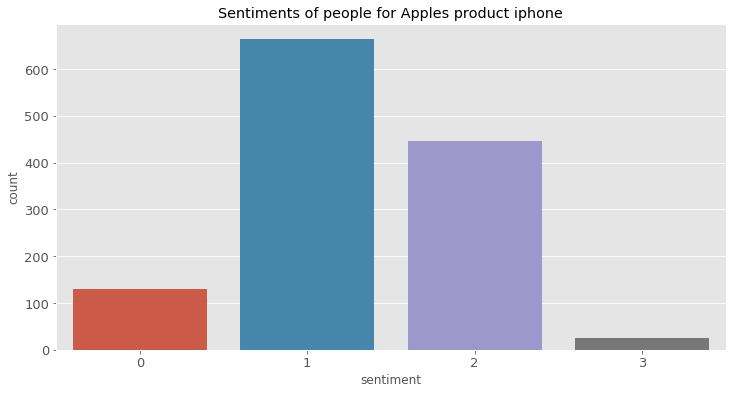

In [0]:

df1=df[['tweet','sentiment']]
df1['tweet']=df['tweet'].str.lower()
df1=df1[df1['tweet'].str.contains("iphone")]
df1
print('=='*100)
#Visualisation of Sentiments for Apple product
plt.figure(figsize=(12,6))
plt.xlabel('Sentiment')
plt.ylabel('Count of tweets')
plt.title('Sentiments of people for Apples product iphone')
sns.countplot(df1['sentiment'])

## **Observations :**
* A total of 1264 tweets were made about iphone. 100+ tweets were in negative sentiment of iphone.More than 600+ tweets were there  having neutral sentiment. More than 400 tweets have positive sentiments regards iphone.Very few tweets were falling under cant say category

## **Sentiments of people for ipad 2**

---



,tweet,sentiment
5,#technews one lone dude awaits ipad 2 at apple...,1
12,"they're giving away ipad 2's, x boxes and book...",2
21,anyone at #sxsw want an ipad 2? i'm in line an...,1
39,rt @mention we're giving away a shiny ipad 2 a...,1
45,#sxsw post-mobile social party by @mention {li...,1
...,...,...
7237,rt @mention anna's social media picks of the w...,1
7239,rt @mention shiny new @mention @mention @menti...,1
7251,"rt @mention #sxsw gear bag: ipad 2, iphone, mo...",1
7255,"sweet, apple's opening a pop-up shop in the sc...",2


<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Count of tweets')

Text(0.5, 1.0, 'Sentiments of people for Apples product ipad 2')

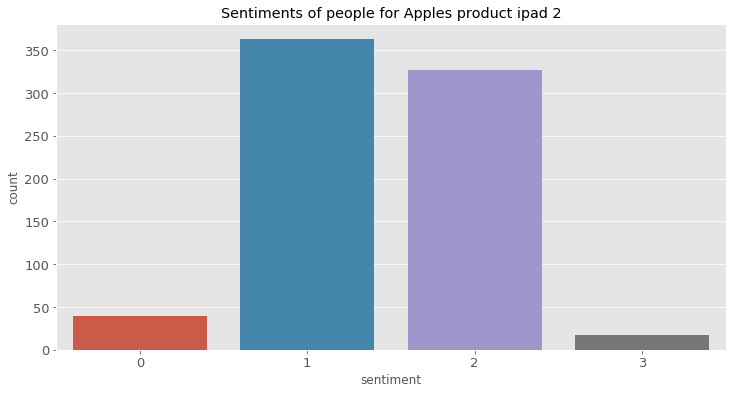

In [0]:
#Sentiments for ipad 2
df1=df[['tweet','sentiment']]
df1['tweet']=df['tweet'].str.lower()
df1=df1[df1['tweet'].str.contains("ipad 2")]
df1
print('=='*100)
#Visualisation of Sentiments for Apple product
plt.figure(figsize=(12,6))
plt.xlabel('Sentiment')
plt.ylabel('Count of tweets')
plt.title('Sentiments of people for Apples product ipad 2')
sns.countplot(df1['sentiment'])

## **Observations:**
* 700+ tweets have mentioned ipad 2 in it . out of that 350+ tweets had neutral sentiments, 300+ tweets had positive sentiment. Very few tweets belong to negative sentiments and cant say category.

## **Sentiments for Google as brand**

---
![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQqr1jwKZMnnXKwypk8o5Pw5Rx0vVwpB0cNKcM2qW3pfT038RRU)

,tweet,sentiment
1,learning ab google doodles! all doodles should...,1
15,"rt @mention google marissa mayer, future of lo...",1
22,_¼ûä___ü ___¡ _____«_µ... &gt;&gt; @mention...,2
23,rt @mention p.s. @mention and google throw a b...,2
25,does anyone know if google did talk about #cir...,1
...,...,...
7262,come see something new about google sketchup p...,1
7266,@mention great stuff on fri #sxsw: marissa may...,2
7268,great visualisation of the ghost movement logi...,2
7269,@mention google plze tammi. i'm in middle of ...,1


<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Count of tweets')

Text(0.5, 1.0, 'Sentiments of people for Google as brand')

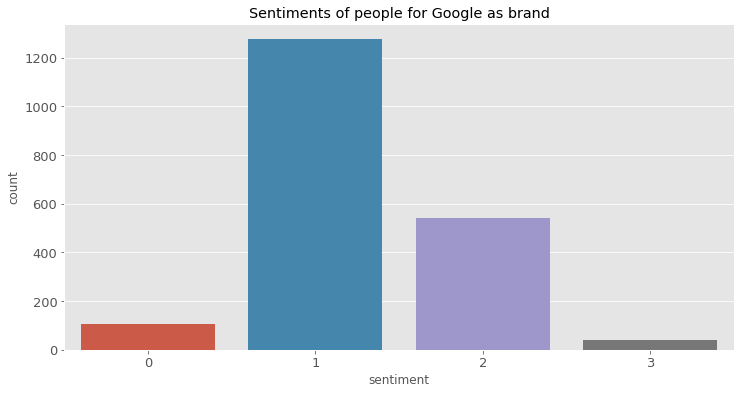

In [0]:
df1=df[['tweet','sentiment']]
df1['tweet']=df['tweet'].str.lower()
df1=df1[df1['tweet'].str.contains("google")]
df1
print('=='*100)
#Visualisation of Sentiments for Apple product
plt.figure(figsize=(12,6))
plt.xlabel('Sentiment')
plt.ylabel('Count of tweets')
plt.title('Sentiments of people for Google as brand')
sns.countplot(df1['sentiment'])

### **Observation**:
* A total of 1900+ tweets were done related to google 1200+ tweets were having neutral sentiments for google. 400+ tweets were showing positive sentiments. Its cool to see that the negative sentiments tweets are very very low.

## **Sentiments of People for Android**

---



,tweet,sentiment
10,rt @mention official #sxsw app û÷sxsw goûª b...,3
16,dl the #calyp app to get into #calyp casa at #...,1
43,"sxsw: groupme says itûªs going global. first,...",1
78,#tech #lightbox_photos wants to be your new #a...,2
135,juts in time for #sxsw =&gt; group-texting war...,2
...,...,...
7199,the #sxsw go app no available for blackberry a...,2
7216,google fires a shot at foursquare with check-i...,1
7248,"tomorrow, charles chen will be speaking about ...",1
7252,û÷viagra for your communicationsûª @mention ...,2


<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Count of tweets')

Text(0.5, 1.0, 'Sentiments of people for Android')

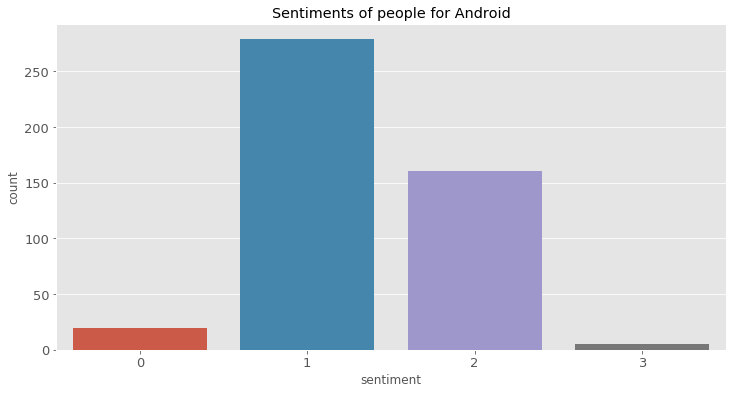

In [0]:
df1=df[['tweet','sentiment']]
df1['tweet']=df['tweet'].str.lower()
df1=df1[df1['tweet'].str.contains("android")]
df1
print('=='*100)
#Visualisation of Sentiments for Apple product
plt.figure(figsize=(12,6))
plt.xlabel('Sentiment')
plt.ylabel('Count of tweets')
plt.title('Sentiments of people for Android')
sns.countplot(df1['sentiment'])

### **Observation**

* A total of 465 tweets were made in all related to android. Most of them have neutral stance for android.150+ tweets are showing positive sentiments. Very few are having negative thougts about google.

## **Lets Analyse Retweets**

---

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTdrgYkeIywyNnNww1abydVOcMFDeeSPndwkFHEbXfgVILh6TeY)

In [0]:
#Creating the Dataframe for retweets for apple and google
df2=df[['tweet','sentiment']]
df2['tweet']=df2['tweet'].str.lower()
A=df2[df2['tweet'].str.startswith('rt')]
A

,tweet,sentiment
10,rt @mention official #sxsw app û÷sxsw goûª b...,3
13,rt @mention we're officially at #sxsw! come by...,1
15,"rt @mention google marissa mayer, future of lo...",1
23,rt @mention p.s. @mention and google throw a b...,2
30,rt @mention any ipad djs here? need one for 3a...,1
...,...,...
7251,"rt @mention #sxsw gear bag: ipad 2, iphone, mo...",1
7256,"rt @mention the future is about networks, not ...",0
7260,rt @mention ipad hipster #austincrowd #sxsw {l...,2
7270,rt @mention ÷¼ are you all set? ÷_ {link} ÷...,1


##  **Lets see How many Retweets are Related to APPLE and its products,and what is the  sentiment** **?**

---



,tweet,sentiment
75,rt @mention in line at what might very well be...,1
87,rt @mention any ipad2's left at the apple stor...,1
98,rt @mention so it appears apple is opening a p...,1
117,rt @mention {link} did you hear? appleûªs ope...,2
120,rt @mention #apple setting up pop-up store aus...,2
...,...,...
7155,rt @mention how cool is this! #apple opening a...,2
7162,rt @mention apple has two austin stores but un...,1
7200,rt ' it's 4 p.m. and the #ipad2 line at the ap...,1
7246,rt @mention \r\nan apple pop-uitp store at #sx...,1


<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Count of retweets')

Text(0.5, 1.0, 'Based on retweets Sentiments of people for Apple')

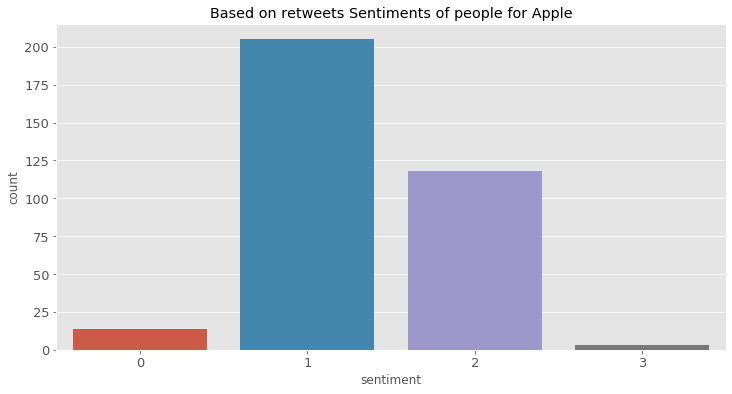

In [0]:
#Apple retweets
A=A[A['tweet'].str.contains("apple")]
A
print('=='*100)
#Visualisation of Sentiments for Apple product
plt.figure(figsize=(12,6))
plt.xlabel('Sentiment')
plt.ylabel('Count of retweets')
plt.title('Based on retweets Sentiments of people for Apple')
sns.countplot(A['sentiment'])

### **Observations**

---
* Around 340 retweets were made in which people talked about Apple. In which 200+ retweets had neutral sentiments.100+ retweets have positve sentiments. Very few had retweets belong to negative sentiments category and can't say Category


### **Apple Iphone retweets**

---



,tweet,sentiment
2877,rt @mention just met three girls from the appl...,1
3469,rt @mention which smartphone rules #sxsw? def...,2
6797,rt @mention the most valuable device at #sxsw ...,2


<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Count of retweets')

Text(0.5, 1.0, 'Based on retweets Sentiments of people for Apple iphone')

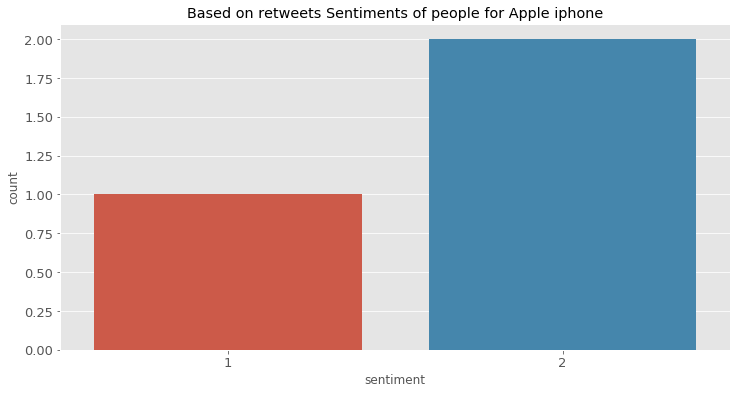

In [0]:
#Iphone retweets
A=A[A['tweet'].str.contains("iphone")]
A
print('=='*100)
#Visualisation of Sentiments for Apple product
plt.figure(figsize=(12,6))
plt.xlabel('Sentiment')
plt.ylabel('Count of retweets')
plt.title('Based on retweets Sentiments of people for Apple iphone')
sns.countplot(A['sentiment'])

## **Meta Features**

---

Distributions of meta features in classes and datasets can be helpful to identify tweets. The meta features used for the analysis are;

- word_count - number of words in tweet
- unique_word_count - number of unique words in tweet
- stop_word_count - number of stop words in tweet
- mean_word_length - average character count in words
- char_count - number of characters in tweet
- punctuation_count - number of punctuations in tweet
- hashtag_count - number of hashtags (#) in tweet
- mention_count - number of mentions (@) in tweet
- retweet_count - number of retweets

In [0]:
df_train=df


In [0]:
#Upload file on google Colab
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
import io
#The command written below is generally used to load .csv format file 
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
df_test.head(5)


,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


## **Creating Meta Features**

---



In [0]:
# word_count
df_train['word_count'] = df_train['tweet'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['tweet'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['tweet'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['tweet'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df_train['stop_word_count'] = df_train['tweet'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_test['stop_word_count'] = df_test['tweet'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# mean_word_length
df_train['mean_word_length'] = df_train['tweet'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['tweet'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['tweet'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['tweet'].apply(lambda x: len(str(x)))

# punctuation_count
df_train['punctuation_count'] = df_train['tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['tweet'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['tweet'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['tweet'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['tweet'].apply(lambda x: len([c for c in str(x) if c == '@']))

## **Visualising Train and Test dataframe**

---

In [0]:
#train Dataframe
df_train.head(2)

,tweet_id,tweet,sentiment,Hashtags,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,"[#sxswnui, #sxsw, #apple]",12,12,2,6.50,89,3,3,0
1,1851,Learning ab Google doodles! All doodles should...,1,"[#GoogleDoodle, #sxsw]",19,19,5,6.58,143,8,2,0


In [0]:
#Test Dataframe
df_test.head(2)

,tweet_id,tweet,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,7506,Audience Q: What prototyping tools do you use?...,18,18,3,6.72,138,11,2,0
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,17,17,2,6.35,124,16,7,0


## **Visualisation**

---
All of the meta features have very similar distributions in training and test set which also proves that training and test set are taken from the same sample.

All of the meta features have information about target as well, but some of them are not good enough such as hashtag_count and mention_count.

On the other hand, word_count, unique_word_count, stop_word_count, mean_word_length, char_count, punctuation_count have very different distributions for positive and negative tweets. Those features might be useful in models.


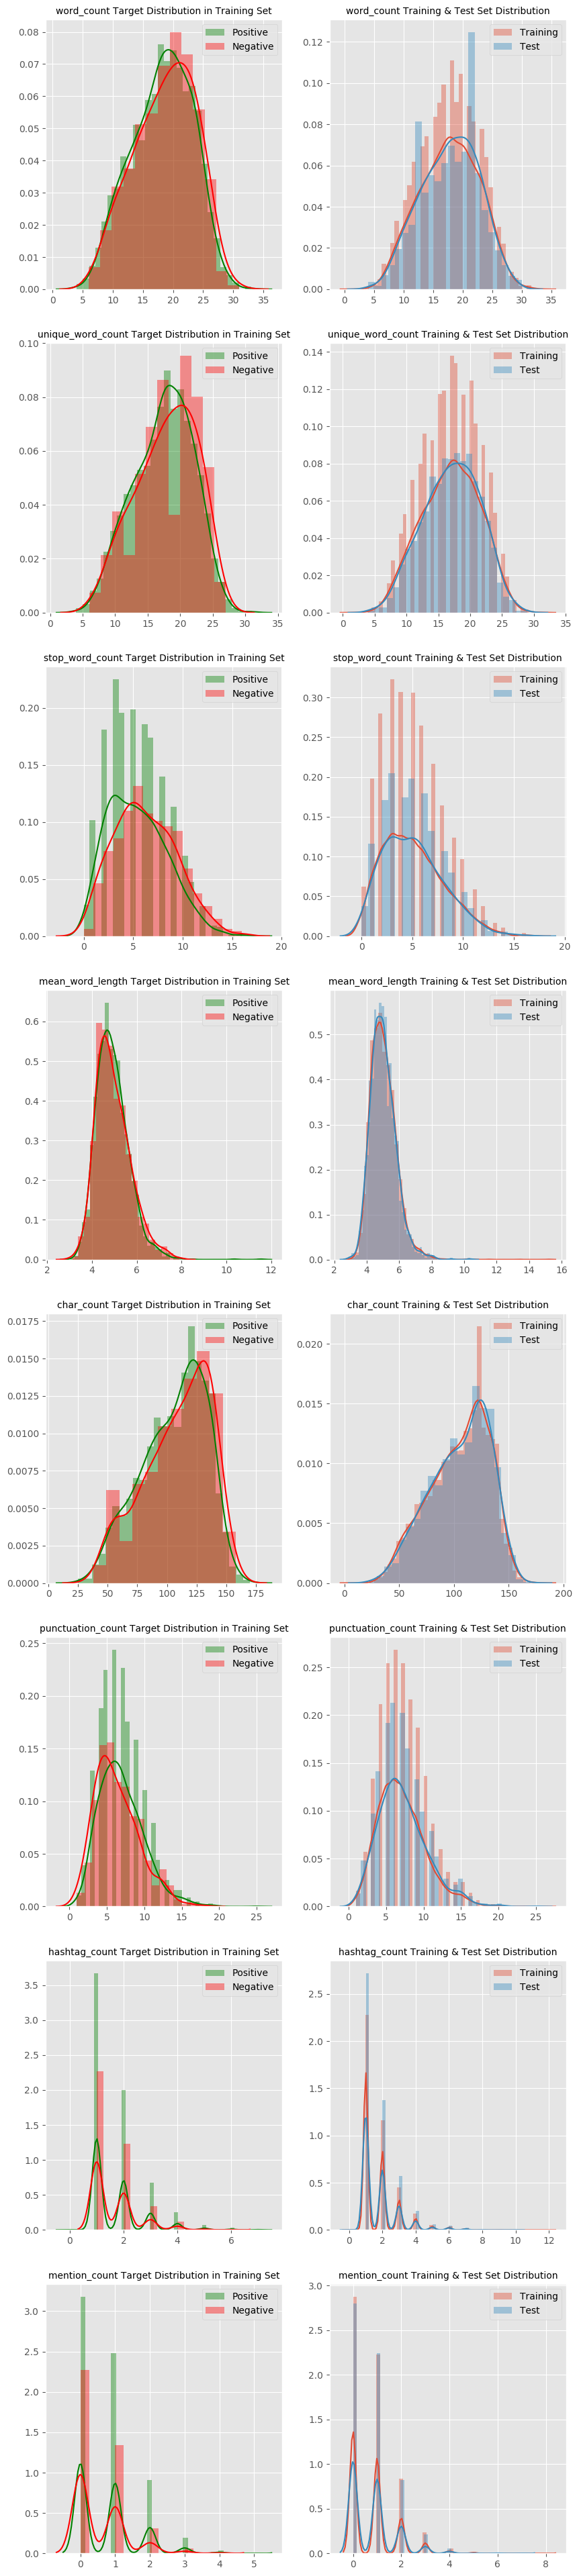

In [0]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
NEGATIVE_TWEETS = df_train['sentiment'] == 0
POSITIVE_TWEETS = df_train['sentiment'] == 2

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(10, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(df_train.loc[POSITIVE_TWEETS][feature], label='Positive', ax=axes[i][0], color='green')
    sns.distplot(df_train.loc[NEGATIVE_TWEETS][feature], label='Negative', ax=axes[i][0], color='red')

    sns.distplot(df_train[feature], label='Training', ax=axes[i][1])
    sns.distplot(df_test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=10)
        axes[i][j].tick_params(axis='y', labelsize=10)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=10)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=10)

plt.show();

## **Lets Check the distribution of target variable Sentiments in Training Data**

---



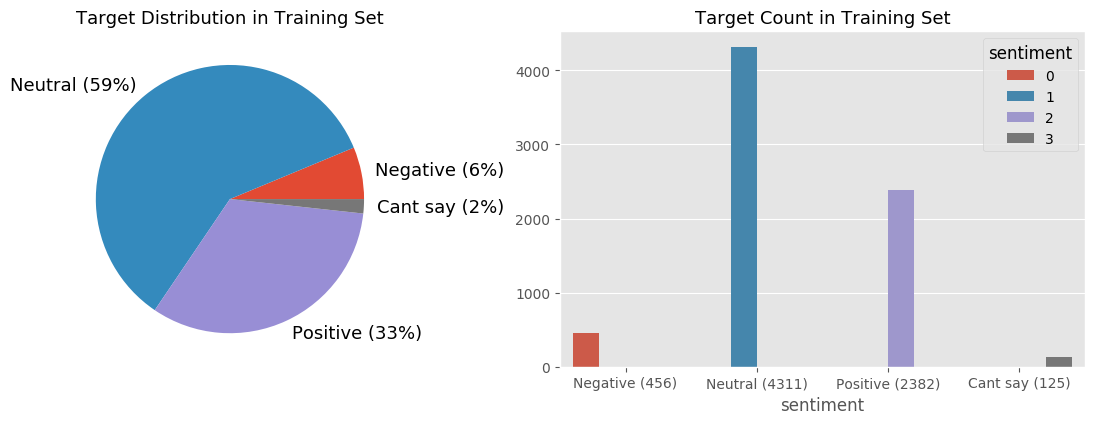

In [0]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), dpi=100)
plt.tight_layout()

df_train.groupby('sentiment').count()['tweet_id'].plot(kind='pie', ax=axes[0], labels=[ 'Negative (6%)' ,'Neutral (59%)', 'Positive (33%)' , 'Cant say (2%)'])
sns.countplot(x=df_train['sentiment'], hue=df_train['sentiment'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Negative (456)', 'Neutral (4311)', 'Positive (2382)','Cant say (125)' ])
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show();

## **Lets find top 100 unigram, bigram, and trigram**

---



In [0]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in df_train[NEGATIVE_TWEETS]['tweet']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in df_train[POSITIVE_TWEETS]['tweet']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df_train[NEGATIVE_TWEETS]['tweet']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in df_train[POSITIVE_TWEETS]['tweet']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in df_train[NEGATIVE_TWEETS]['tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in df_train[POSITIVE_TWEETS]['tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

## **Visualisation of Unigram tweet**

---



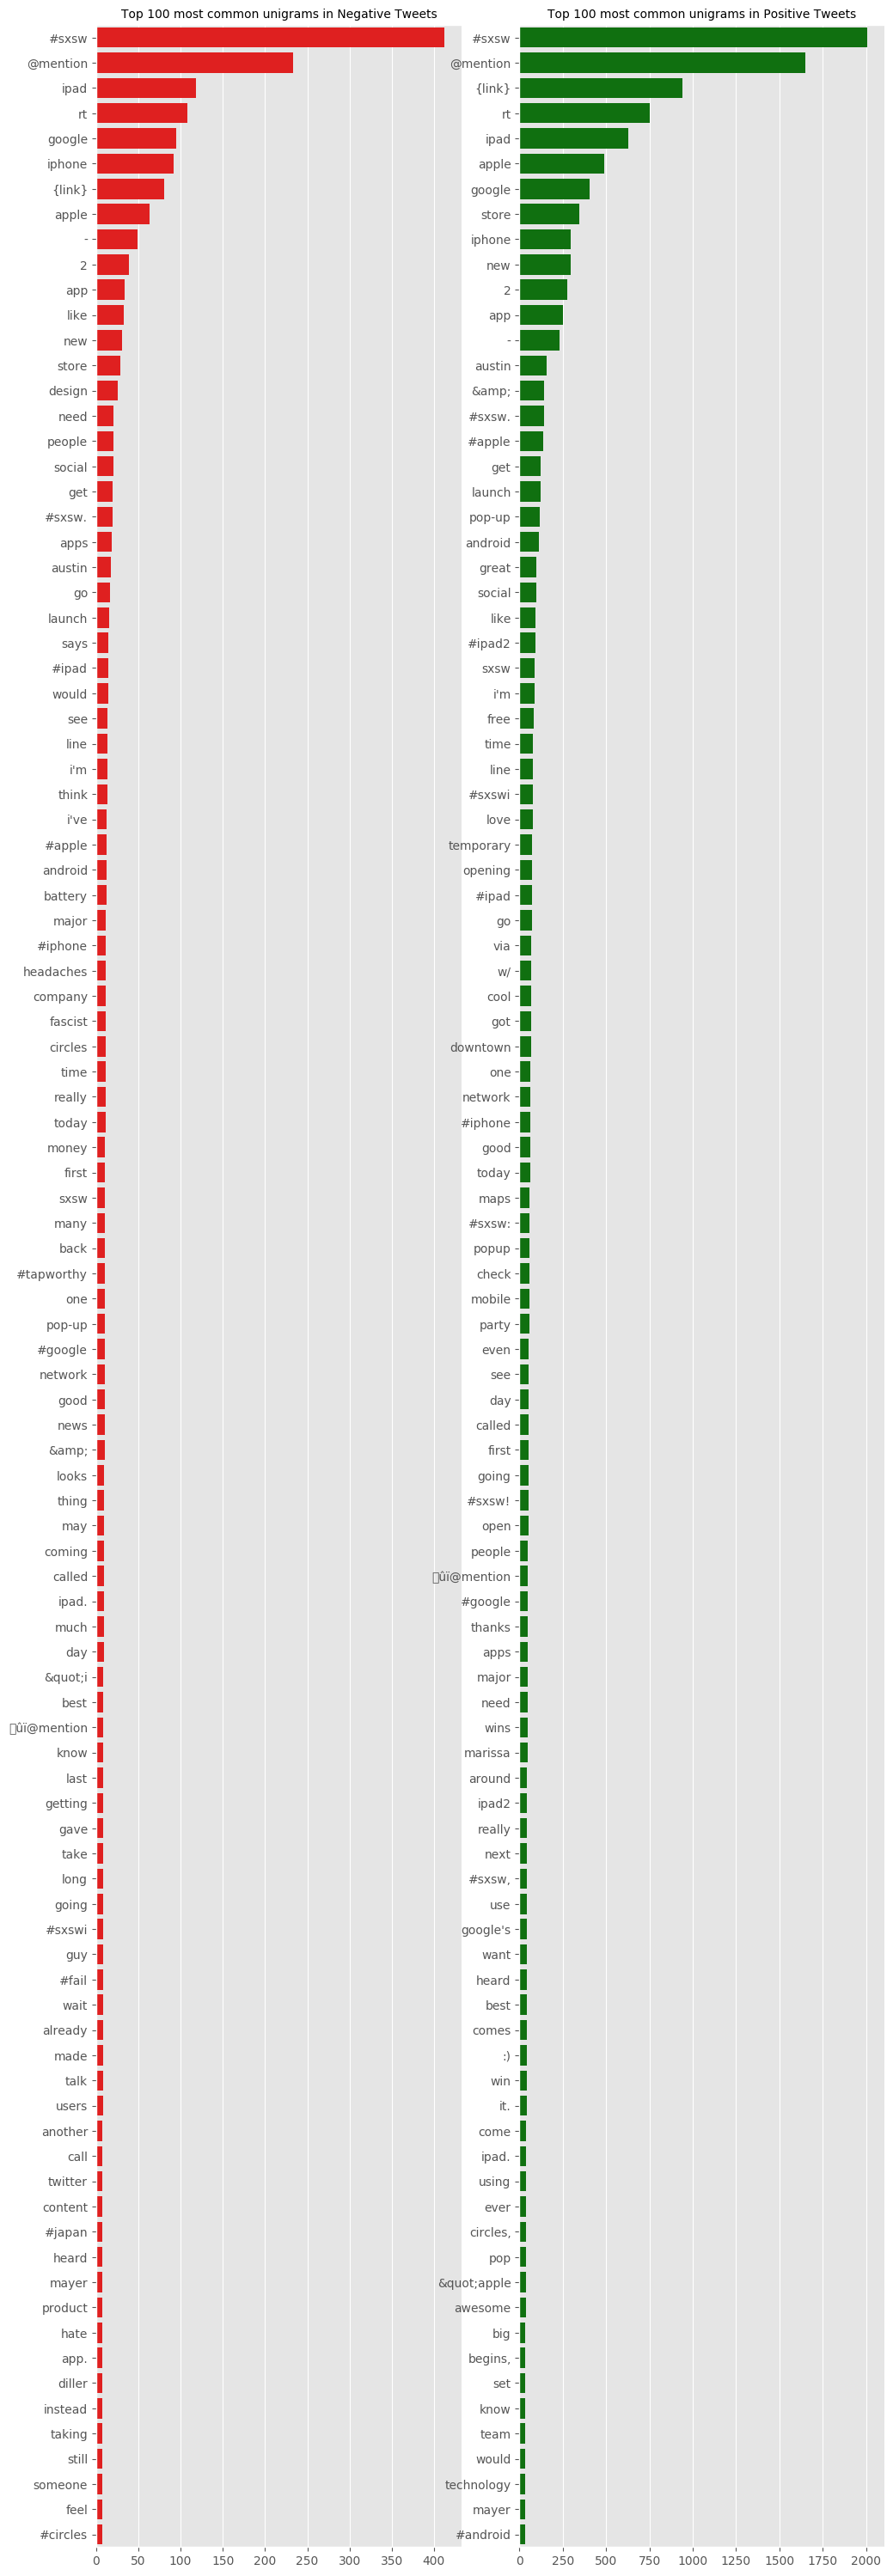

In [0]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

axes[0].set_title(f'Top {N} most common unigrams in Negative Tweets', fontsize=10)
axes[1].set_title(f'Top {N} most common unigrams in Positive Tweets', fontsize=10)

plt.show();

## **Visualisation of Bigram Tweet**

---



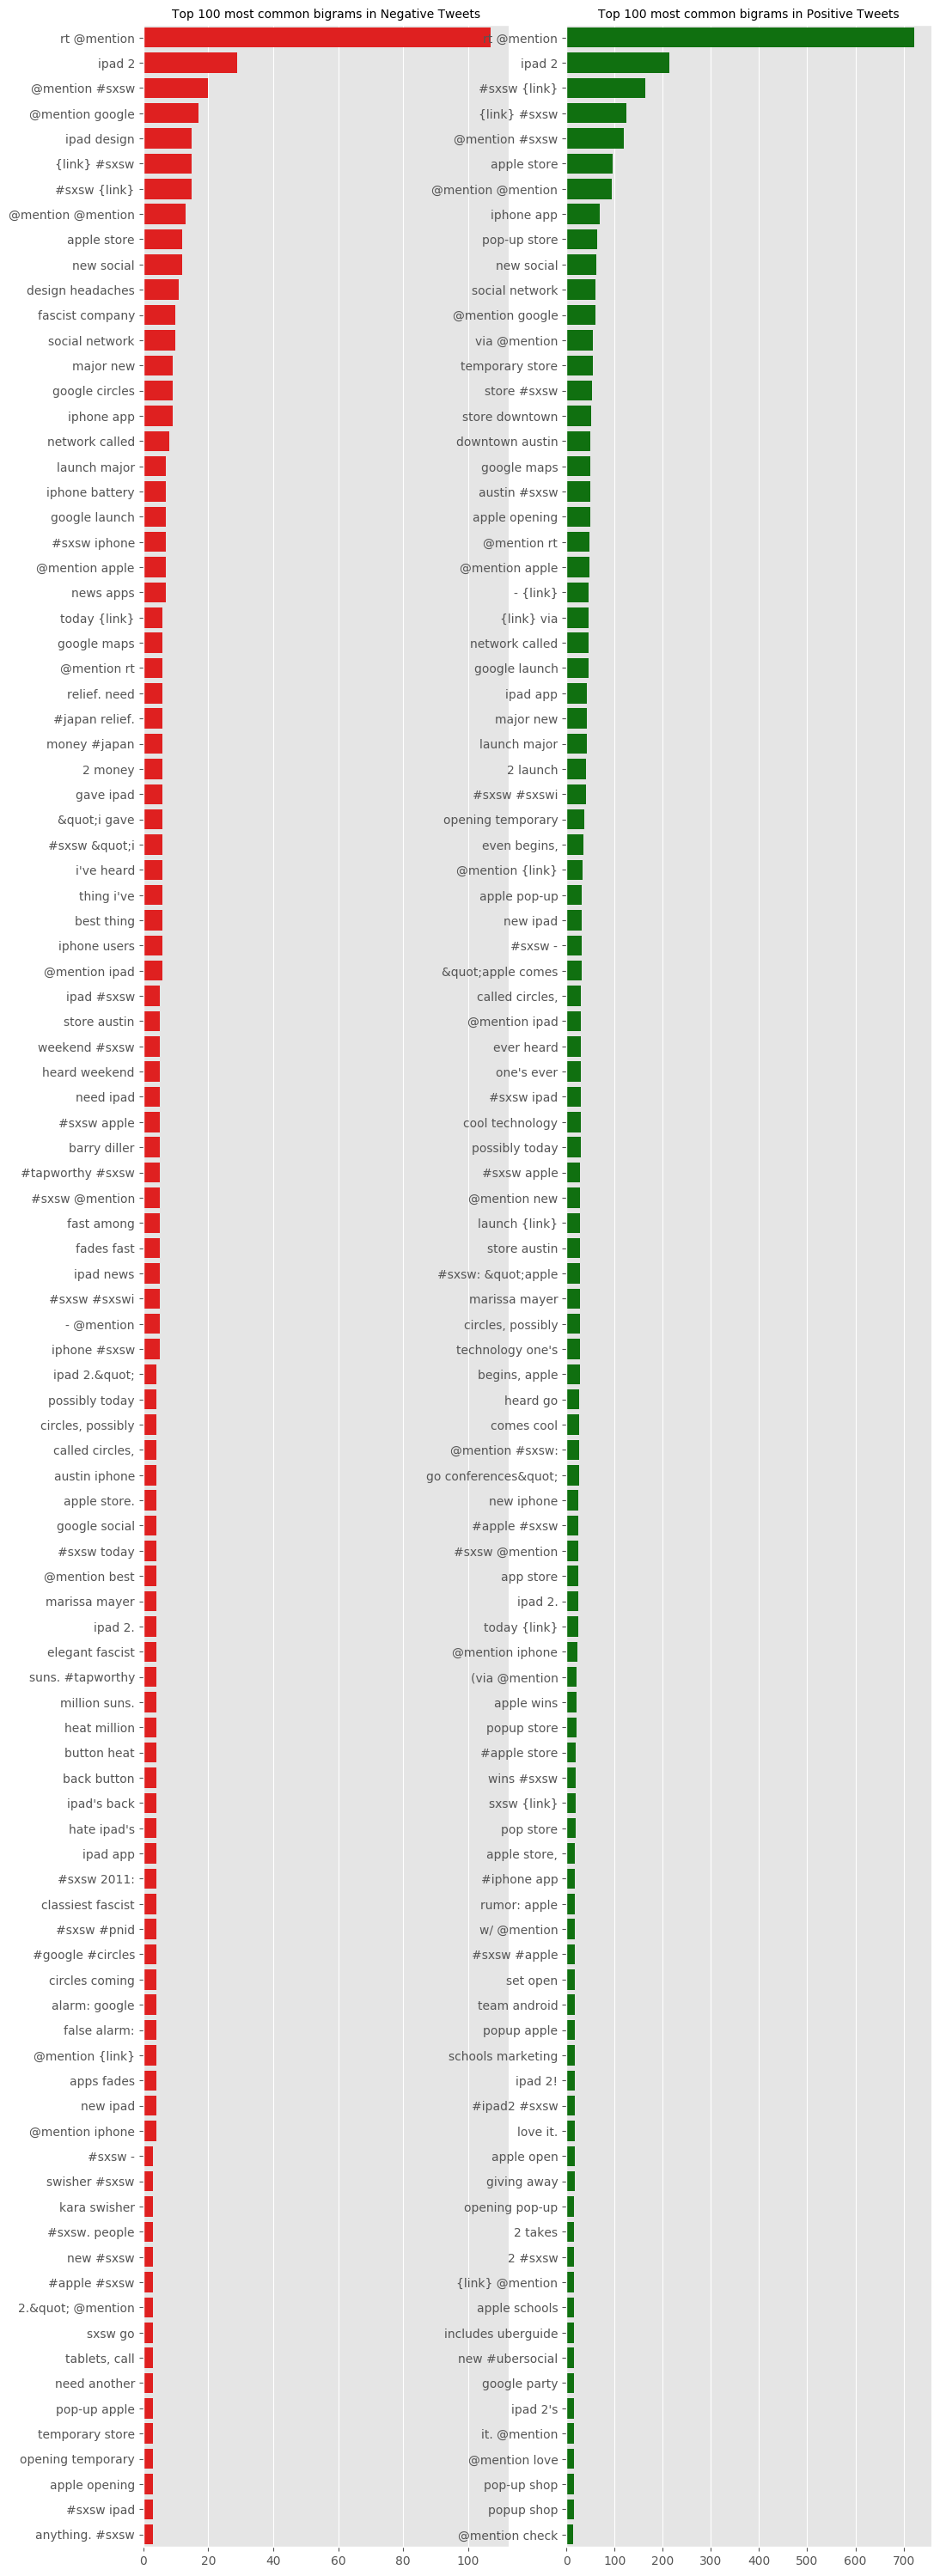

In [0]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

axes[0].set_title(f'Top {N} most common bigrams in Negative Tweets', fontsize=10)
axes[1].set_title(f'Top {N} most common bigrams in Positive Tweets', fontsize=10)

plt.show();

## **Visualisation of Trigram**

---



Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'Top 100 most common trigrams in Negative Tweets')

Text(0.5, 1.0, 'Top 100 most common trigrams in Poitive Tweets')

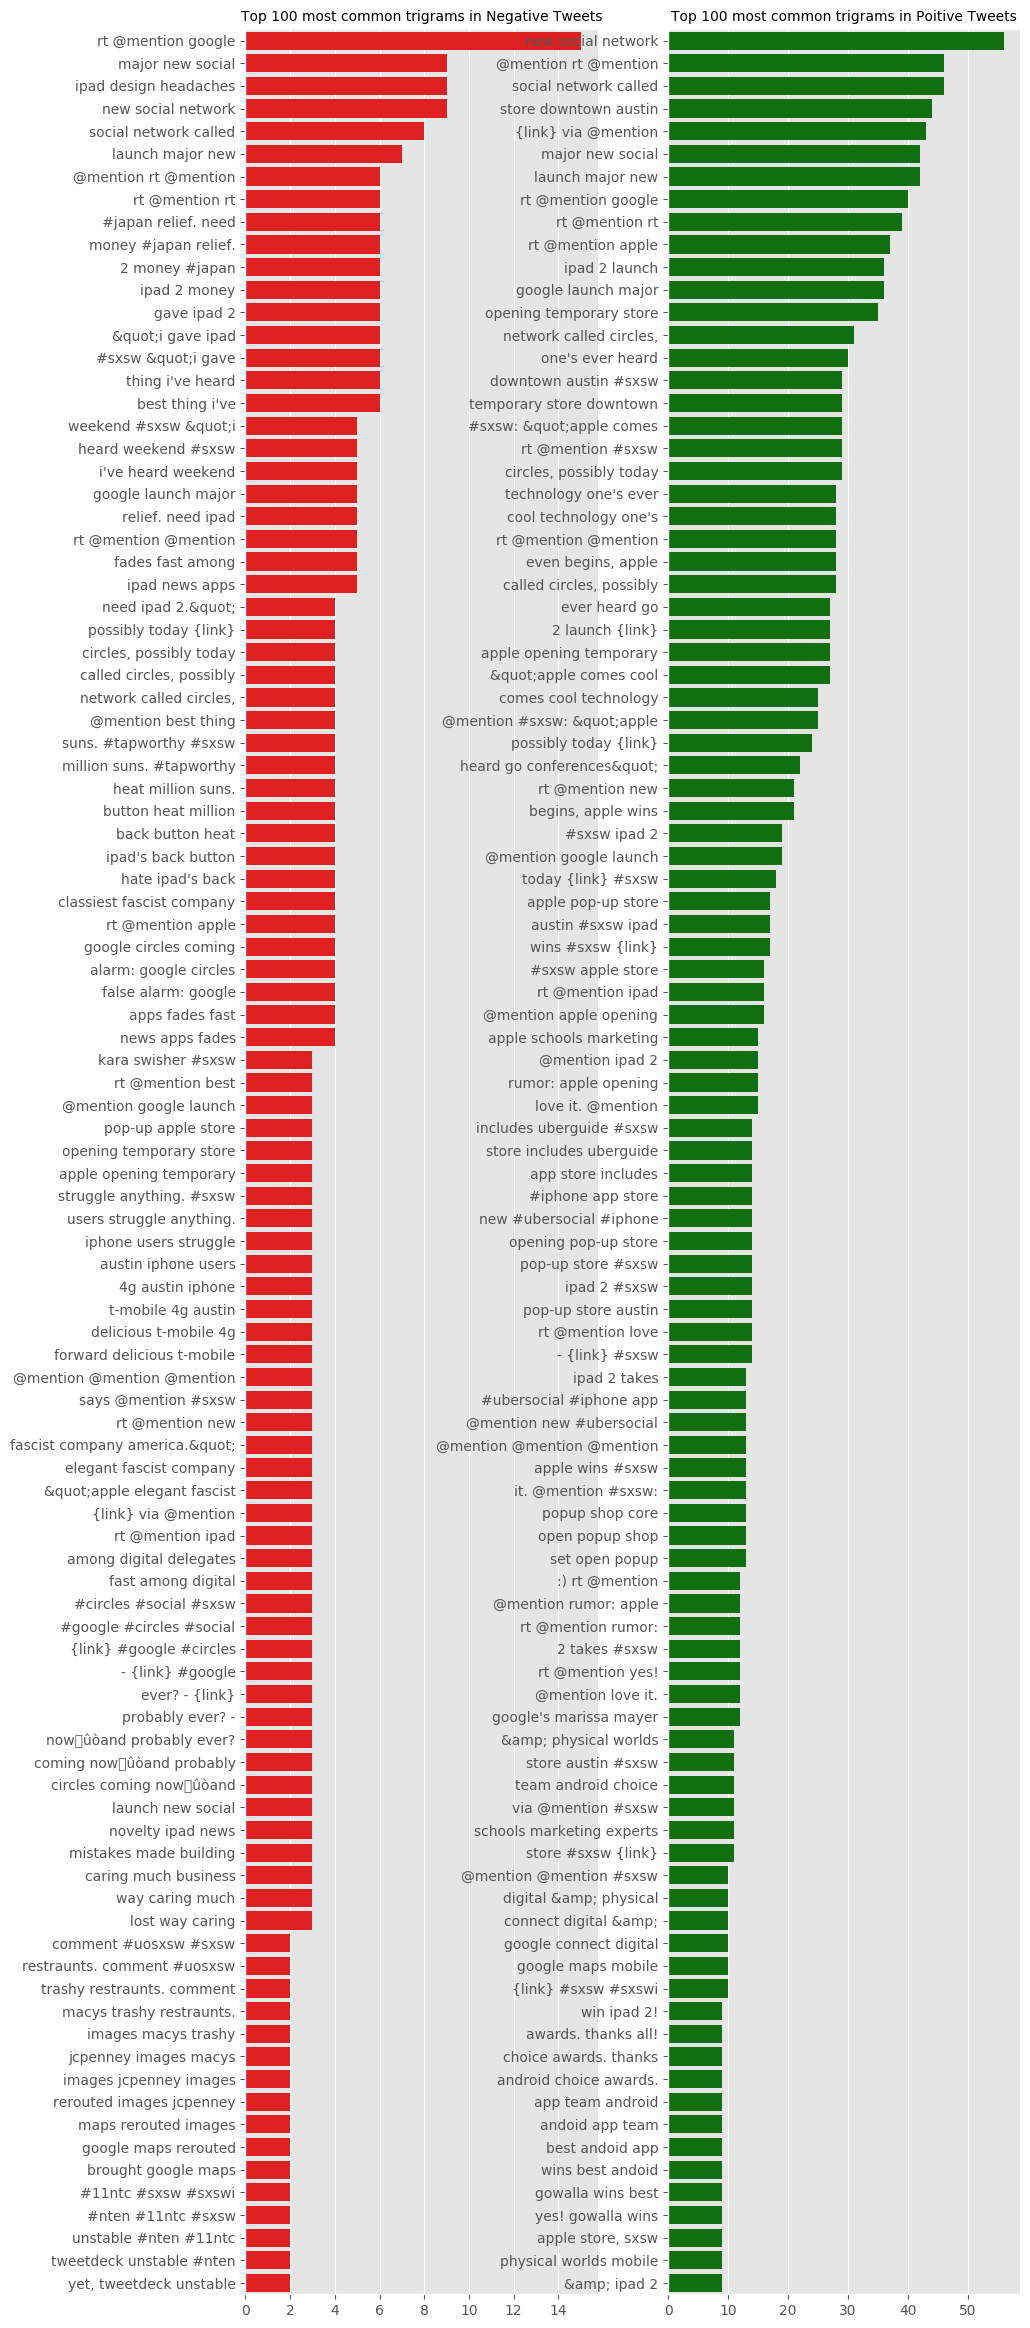

In [0]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 30), dpi=100)

sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

axes[0].set_title(f'Top {N} most common trigrams in Negative Tweets', fontsize=10)
axes[1].set_title(f'Top {N} most common trigrams in Poitive Tweets', fontsize=10)

plt.show()